In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
np.set_printoptions(suppress=True)

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
(train_data, train_targets), (test_data, test_targets) = keras.datasets.boston_housing.load_data()

In [5]:
train_data.shape #(레코드 수, 독립변수 수)

(404, 13)

In [6]:
train_targets.shape

(404,)

404개의 data points <br>
13개의 독립변수

In [7]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [8]:
train_targets[:5]

array([15.2, 42.3, 50. , 21.1, 17.7])

종속변수는 미국 Boston에 속한 도시들의 70년대 중반 집들의 중간값 <br>
data point는 도시 <br>
독립변수는 범죄율, 교통 편의성 등 <br>
10 = > $ 10K

In [7]:
# 데이터 정규화 ((x-mean)/std)
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [8]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [9]:
train_data.shape

(404, 13)

In [10]:
model = models.Sequential()

In [11]:
model.add(layers.Dense(64, activation = 'relu', kernel_initializer = 'glorot_uniform', input_shape=(train_data.shape[1],)))
#kernel_initaializer(가중치초기화방법): glorot_uniform (Xavier 방법)

In [14]:
model.add(layers.Dense(64, activation = 'relu', kernel_initializer = 'glorot_uniform'))

In [15]:
model.add(layers.Dense(1))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


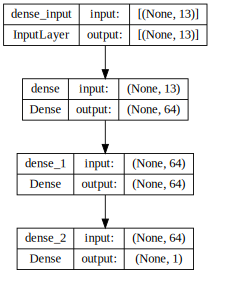

In [17]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model, show_shapes= True, show_layer_names=True, dpi=65).create(prog='dot', format='svg'))

#input: 입력되는 데이터의 형태, output: 출력되는 데이터의 형태 -> 13개의 피쳐를 받아 64개의 피쳐로 출력함
#한번 학습할 때 몇 개의 레코드를 사용하는 지 몰라 None으로 표기됨, 나중에 배치사이즈=64 -> None 대신 64를 넣어 계산함

SGD optimizer 사용하기

In [12]:
sgd= tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)
# 모멘텀: defalut 0, 모멘텀 식에서의 감마 값, 대부분 0.9 사용
# nesterov: True -> 일반 모멘텀 대신 nesterov momentum을 사용하겠다

In [13]:
model.compile(optimizer=sgd, loss='mse')

In [14]:
history = model.fit(train_data, train_targets, epochs=80, batch_size=64)
# 미니배치사이즈=64, 보통 2의 제곱수를 사용함
# 학습데이터 전체 404개, 미니배치 64개 -> 1 epoch 당 7번 (404/64=6.xxx) 업데이트 -> 아래 7/7이 이 의미임
# epoch: 전체 학습 데이터를 몇 번 사용할 것인지

Epoch 1/80
7/7 [==============================] - 1s 5ms/step - loss: 575.9310
Epoch 2/80
7/7 [==============================] - 0s 5ms/step - loss: 574.9339
Epoch 3/80
7/7 [==============================] - 0s 8ms/step - loss: 573.4284
Epoch 4/80
7/7 [==============================] - 0s 9ms/step - loss: 571.5175
Epoch 5/80
7/7 [==============================] - 0s 11ms/step - loss: 569.3824
Epoch 6/80
7/7 [==============================] - 0s 8ms/step - loss: 567.0696
Epoch 7/80
7/7 [==============================] - 0s 9ms/step - loss: 564.6589
Epoch 8/80
7/7 [==============================] - 0s 4ms/step - loss: 562.1157
Epoch 9/80
7/7 [==============================] - 0s 8ms/step - loss: 559.4473
Epoch 10/80
7/7 [==============================] - 0s 8ms/step - loss: 556.7549
Epoch 11/80
7/7 [==============================] - 0s 8ms/step - loss: 554.0062
Epoch 12/80
7/7 [==============================] - 0s 11ms/step - loss: 551.2534
Epoch 13/80
7/7 [==============================

## Loss 값 변화 살펴보기

In [15]:
import matplotlib.pyplot as plt

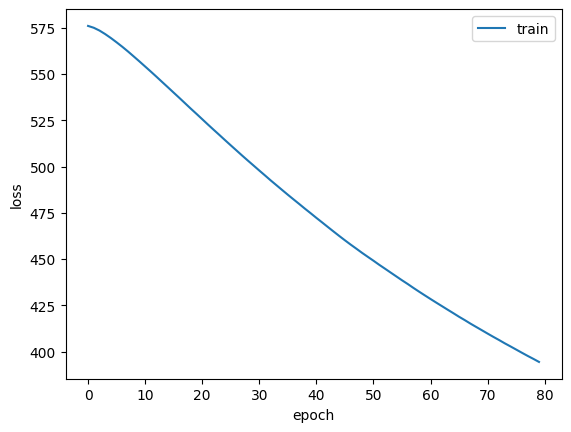

In [20]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train'])
plt.show()

# 성능 평가하기

In [23]:
test_data.shape

(102, 13)

In [27]:
y_pred = model.predict(test_data)

4/4 [==============================] - 0s 3ms/step


In [29]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_targets, y_pred)**0.5

ValueError: y_true and y_pred have different number of output (1!=64)

In [23]:
test_targets.shape

(102,)

In [26]:
y_pred

array([[ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         9.452842 ],
       [ 0.       ,  3.3244731,  0.7517288, ...,  1.0007886,  0.8900837,
         2.870164 ],
       [ 7.193035 ,  3.3974638,  7.7374496, ...,  7.6195154,  7.4392405,
         0.       ],
       ...,
       [ 4.969231 , 10.61603  ,  5.5140862, ...,  5.616912 ,  6.1568375,
         4.0502844],
       [ 6.5716157,  8.256573 ,  7.9098988, ...,  7.5689216,  7.3745365,
         2.0931897],
       [ 0.       ,  3.036962 ,  0.       , ...,  0.       ,  0.       ,
         3.871147 ]], dtype=float32)

In [19]:
from sklearn.metrics import r2_score
r2_score(test_targets, y_pred)

ValueError: y_true and y_pred have different number of output (1!=64)